# Ensemble Learning Implementation

---

Ensemble learning is an algorithm that combines multiple models and averages the output to produce a prediction. In this module, we will investigate the [random forests](https://scikit-learn.org/stable/modules/ensemble#forests-of-randomized-trees.html) and [voting regressor](https://scikit-learn.org/stable/modules/ensemble#voting-regressor.html) models.

This project will follow the 4 phase process of a typical machine learning project.

Phase 1: Data Cleaning/Analysis

Phase 2: Train the model

Phase 3: Test the model

Phase 4: Compare the results

---
# Phase 1 - Data Cleaning/Analysis

Our [data](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) is a set of real estate valuates from New Taipei City,Taiwan. We will first load a dataframe and inspect the data. In this module, we will combine PCA in order to visualize the data, and compare the MSE of the full-featured and PCA models. Therefore, part of the data preperation will include a feature-reduction, and further references to the data will reference the full feature as well as the reduced featured dataset.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv("Real estate.csv")
data_df = data_df.drop(['No'], axis=1)

scaler = StandardScaler()
pca = PCA(n_components = 1)

for feature in data_df.columns[:-1]:
    data_df[[feature]] = scaler.fit_transform(data_df[[feature]])

X = data_df[data_df.columns[:-1]]
y = data_df[data_df.columns[-1]]

X_reduced = pca.fit_transform(X)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Phase 2: Train the Model
---

In this phase, we will fit the model. This is easily accomplished by passing the data and labels to the .fit module. Here, we will train both the random forests and the voting regressor. For the voting regressor, we will use all models discussed in the regression section of this repository. We create a model for the full-feature and reduced feature datasets.

In [45]:
rf = RandomForestRegressor()
rf2 = RandomForestRegressor()

rf.fit(X_train, y_train)
rf2.fit(Xr_train, yr_train)

knn = KNeighborsRegressor(n_neighbors=4)
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=3)
svm = SVR()

eclf = VotingRegressor(estimators=[('rf', rf), ('lr', lr),('knn', knn),('dt', dt),('svm', svm)])
eclf2 = VotingRegressor(estimators=[('rf', rf), ('lr', lr),('knn', knn),('dt', dt),('svm', svm)])

eclf.fit(X_train, y_train)
eclf2.fit(Xr_train, yr_train)




VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('lr', LinearRegression()),
                            ('knn', KNeighborsRegressor(n_neighbors=4)),
                            ('dt', DecisionTreeRegressor(max_depth=3)),
                            ('svm', SVR())])

# Phase 3: Test the Model
---

In this phase, we will predict on the test set, and review the MSE. We are taking the average of all outputs of the estimators created in Phase 2. We expect the errors in each model to be mitigated more than the analysis performed for each model individually. The output of both the random forests model and the voting regressor model should be better than single previous model. 

In [53]:
from sklearn.metrics import mean_absolute_error

rf_pred = rf.predict(X_test)
eclf_pred = eclf.predict(X_test)

red_rf_pred = rf2.predict(Xr_test)
red_eclf_pred = eclf2.predict(Xr_test)

print(f"Full Featured Random Forest MSE: {np.round(mean_squared_error(y_test, rf_pred),2)}")
print(f"Full Featured Voting Regressor MSE: {np.round(mean_squared_error(y_test, eclf_pred),2)}")
print(f"Full Featured Random Forest MAE: {np.round(mean_absolute_error(y_test, rf_pred),2)}")
print(f"Full Featured Voting Regressor MAE: {np.round(mean_absolute_error(y_test, eclf_pred),2)}")


print('\n')
print(f"Reduced Featured Random Forest MSE: {np.round(mean_squared_error(yr_test, red_rf_pred),2)}")
print(f'Reduced Featured Voting Regressor MSE: {np.round(mean_squared_error(yr_test, red_eclf_pred),2)}')
print(f"Reduced Featured Random Forest MAE: {np.round(mean_absolute_error(yr_test, red_rf_pred),2)}")
print(f'Reduced Featured Voting Regressor MAE: {np.round(mean_absolute_error(yr_test, red_eclf_pred),2)}')

Full Featured Random Forest MSE: 41.1
Full Featured Voting Regressor MSE: 44.26
Full Featured Random Forest MAE: 4.21
Full Featured Voting Regressor MAE: 4.51


Reduced Featured Random Forest MSE: 83.99
Reduced Featured Voting Regressor MSE: 64.57
Reduced Featured Random Forest MAE: 6.85
Reduced Featured Voting Regressor MAE: 6.1


As expected (and explained in the PCA section of this repository), the full-featured set performs much better than the reduced featured set. This is primarily because information is lost during PCA and reducing a dataset from 7 features to 1 will inevitable have a dramatic impact on the predictions.

Below, we will make use of the dimensionality reduction to plot the predictions. The 'Predicted' set are the predictions from the full featured set, and the 'Predictions Reduced' are the predictions from the reduced set. This allows us to see how the models are interpreting the dataset, and how well they fit. As expected the reduced dataset has much less variance compared to the full featured set. The predicted data, however, follows the true set much better than any singular dataset discussed in the PCA folder of this repository.

Text(0, 0.5, 'label')

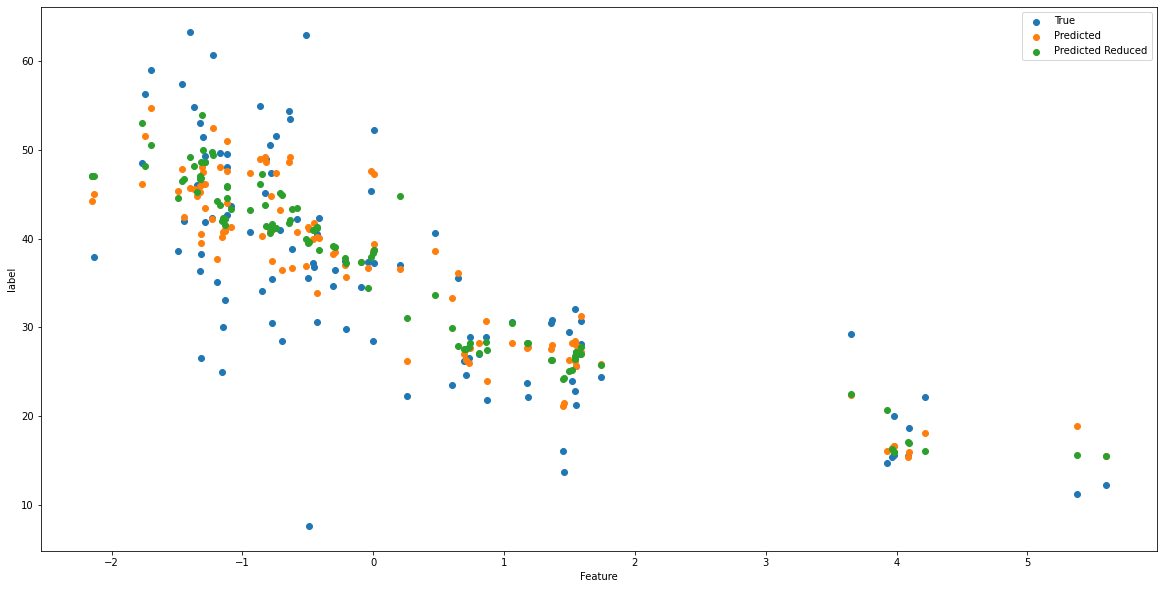

In [48]:
plt.figure(figsize = (20,10))
plt.scatter(Xr_test, y_test, label = "True")
plt.scatter(Xr_test, eclf.predict(X_test), label = 'Predicted')
plt.scatter(Xr_test, eclf2.predict(Xr_test), label = 'Predicted Reduced')

plt.legend()
plt.xlabel('Feature')
plt.ylabel('label')

## Phase 4: Model Comparison

The scores for classification models are below:
- Linear Regression (best of variations: Elastic Net): 
    - MSE = 69.6
    - MAE = 6.02
- Gradient Descent: 
    - MSE = 70.32
    - MAE = 6.0
- K-Nearest Neighbors Regression (KNN)*: 
    - MSE = 71.49
    - MAE = 6.0
- Tree Regression*: 
    - MSE = 59.15
    - MAE = 5.47
- Support Vector Machine Regression (SVMR)*: 
    - MSE = 72.68
    - MAE = 6.13
- Voting Regressor: 
    - MSE = 44.26
    - MAE = 4.51
- Random Forests
    - MSE = 41.1
    - MAE = 4.21


Outside of the ensemble leaerning models, the best performing model was the Decision Tree Regression model with an MSE of 59.15 and an MAE of 5.47. The next best performing model is the linear regression model, followed by gradient descent, KNN, then finally the support vector machine. It is interesting the linear regression model and the gradient descent model have different MSE and MAE values, however this can be due the randomness when shuffling and splitting the data. 

The Tree Regression model is the best performing, fastest training, and is also easily understood. If we were selecting a model to pursue to further enhance the project, we would select the tree regression model.

The best overall models are the ensemble models. The random forests outperform the voting regressor (just as the pure decision tree outperformed the rest), however both are substantially better than any other model discussed. This is as expected as ensemble learning is expected to mitigate the errors from any individual model. While we would have to train and fit each model, increasing our computational and resource costs, the benifits are significant. For this project, we do not have issues with resources or computation time and would therefore use the random forest model. 